Modelo de Aprendizaje Profundo

In [1]:
# Importacion de librerias

#Manejo de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Modelado y evaluacion
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

#Redes Neuronales
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [10]:
# =========================
# Cargar dataset de features simples
# =========================
dataset = pd.read_csv("Dataset/features_simples.csv")
print(dataset.head())

                                 flow  packet_count  total_bytes  \
0  192.168.1.11:32768-192.168.1.10:80             9       3600.0   
1  192.168.1.11:32768-192.168.1.12:80            18       5605.0   
2  192.168.1.11:32770-192.168.1.10:80            18       4764.0   
3  192.168.1.11:32770-192.168.1.12:80            13       3623.0   
4  192.168.1.11:32772-192.168.1.10:80            10       4139.0   

   avg_packet_len  payload_sum  small_packet_count  syn_count  ack_count  \
0      400.000000       3006.0                 0.0          0          0   
1      311.388889       4397.0                 6.0          1          4   
2      264.666667       3568.0                 8.0          1          4   
3      278.692308       2757.0                 5.0          1          3   
4      413.900000       3479.0                 0.0          0          0   

   fin_count  label  
0          0      2  
1          0      2  
2          0      2  
3          0      2  
4          0      2  


Clases encontradas: [0 1 2]
Epoch 1/25


d:\Proyectos\WProyecto\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


725/725 - 3s - 4ms/step - accuracy: 0.9826 - loss: 0.0723 - val_accuracy: 0.9968 - val_loss: 0.0090
Epoch 2/25
725/725 - 1s - 2ms/step - accuracy: 0.9955 - loss: 0.0131 - val_accuracy: 0.9966 - val_loss: 0.0091
Epoch 3/25
725/725 - 1s - 2ms/step - accuracy: 0.9965 - loss: 0.0108 - val_accuracy: 0.9978 - val_loss: 0.0077
Epoch 4/25
725/725 - 1s - 2ms/step - accuracy: 0.9965 - loss: 0.0100 - val_accuracy: 0.9981 - val_loss: 0.0070
Epoch 5/25
725/725 - 1s - 2ms/step - accuracy: 0.9976 - loss: 0.0084 - val_accuracy: 0.9974 - val_loss: 0.0078
Epoch 6/25
725/725 - 1s - 2ms/step - accuracy: 0.9975 - loss: 0.0079 - val_accuracy: 0.9977 - val_loss: 0.0066
Epoch 7/25
725/725 - 1s - 2ms/step - accuracy: 0.9975 - loss: 0.0079 - val_accuracy: 0.9979 - val_loss: 0.0062
Epoch 8/25
725/725 - 1s - 2ms/step - accuracy: 0.9978 - loss: 0.0076 - val_accuracy: 0.9982 - val_loss: 0.0059
Epoch 9/25
725/725 - 1s - 2ms/step - accuracy: 0.9974 - loss: 0.0073 - val_accuracy: 0.9982 - val_loss: 0.0060
Epoch 10/25


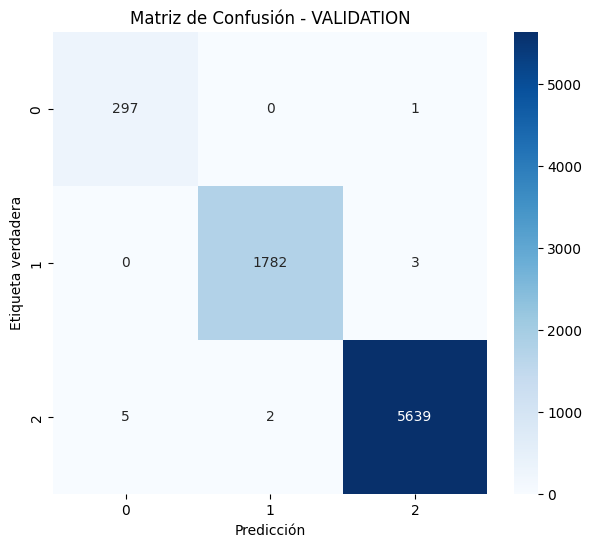


Scores finales en VALIDATION:
Accuracy: 0.999
F1-score (macro): 0.996
F1-score (weighted): 0.999


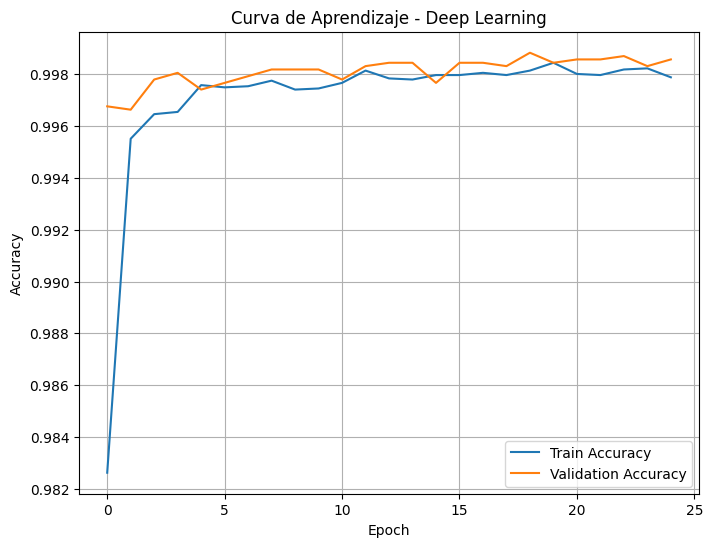

In [12]:
# =========================
# Separar características y etiquetas
# =========================
features = dataset.drop(columns=['flow','label'])  # Variables predictoras
targets = dataset['label']                        # Etiquetas

# =========================
# Codificar etiquetas a números
# =========================
label_encoder = LabelEncoder()
targets_encoded = label_encoder.fit_transform(targets)
num_classes = len(label_encoder.classes_)
print("Clases encontradas:", label_encoder.classes_)

# =========================
# Normalizar features
# =========================
feature_scaler = StandardScaler()
features_scaled = feature_scaler.fit_transform(features)

# =========================
# División Train/Test/Validation
# =========================
X_train_val, X_validation, y_train_val, y_validation = train_test_split(
    features_scaled, targets_encoded, test_size=0.2, random_state=42, stratify=targets_encoded
)

X_train, X_test, y_train, y_test = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val
)
# Resultado: 60% train, 20% test, 20% validation

# =========================
# One-hot encoding para Deep Learning
# =========================
y_train_oh = tf.keras.utils.to_categorical(y_train, num_classes)
y_validation_oh = tf.keras.utils.to_categorical(y_validation, num_classes)

# =========================
# Construir modelo de Deep Learning
# =========================
modelo_dl = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(num_classes, activation='softmax')
])

modelo_dl.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Early stopping
detener_antes = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# =========================
# Entrenamiento
# =========================
historial_entrenamiento = modelo_dl.fit(
    X_train, y_train_oh,
    validation_data=(X_validation, y_validation_oh),
    epochs=25,
    batch_size=32,
    callbacks=[detener_antes],
    verbose=2
)

# =========================
# Evaluación en VALIDATION
# =========================
y_val_pred_prob = modelo_dl.predict(X_validation)
y_val_pred = np.argmax(y_val_pred_prob, axis=1)

# Convertir clases a strings para evitar errores
clases_str = [str(c) for c in label_encoder.classes_]

print("\n=== Reporte de clasificación - VALIDATION ===")
print(classification_report(y_validation, y_val_pred, target_names=clases_str))

# Matriz de confusión
matriz_conf = confusion_matrix(y_validation, y_val_pred)
plt.figure(figsize=(7,6))
sns.heatmap(matriz_conf, annot=True, fmt='d', cmap='Blues',
            xticklabels=clases_str, yticklabels=clases_str)
plt.xlabel("Predicción")
plt.ylabel("Etiqueta verdadera")
plt.title("Matriz de Confusión - VALIDATION")
plt.show()

# =========================
# Scores finales
# =========================
accuracy_val = accuracy_score(y_validation, y_val_pred)
f1_macro = f1_score(y_validation, y_val_pred, average='macro')
f1_weighted = f1_score(y_validation, y_val_pred, average='weighted')

print("\nScores finales en VALIDATION:")
print(f"Accuracy: {accuracy_val:.3f}")
print(f"F1-score (macro): {f1_macro:.3f}")
print(f"F1-score (weighted): {f1_weighted:.3f}")

# =========================
# Curva de aprendizaje
# =========================
plt.figure(figsize=(8,6))
plt.plot(historial_entrenamiento.history['accuracy'], label='Train Accuracy')
plt.plot(historial_entrenamiento.history['val_accuracy'], label='Validation Accuracy')
plt.title("Curva de Aprendizaje - Deep Learning")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [13]:
# =========================
# Cargar dataset de features simples
# =========================
dataset = pd.read_csv("Dataset/DoS_window_features.csv")
print(dataset.head())

   window_id    start_time      end_time  total_packets  total_bytes  \
0          0  1.698376e+09  1.698376e+09           2756     502668.0   
1          1  1.698376e+09  1.698376e+09           2221     430794.0   
2          2  1.698376e+09  1.698376e+09           4925     820389.0   
3          3  1.698376e+09  1.698376e+09           3727     626560.0   
4          4  1.698376e+09  1.698376e+09           2945     516173.0   

   avg_packet_size  avg_payload_size  packet_rate  small_packet_ratio  \
0       182.390421        114.116110       5512.0            0.730044   
1       193.963980        125.642503       4442.0            0.704638   
2       166.576447         98.696244       9850.0            0.766904   
3       168.113764        100.196941       7454.0            0.764422   
4       175.270968        107.217317       5890.0            0.750085   

   syn_count  ack_count  fin_count  label  
0        749       2007          0      1  
1        640       1581          0      

Clases encontradas: [0 1 2]
Epoch 1/50


d:\Proyectos\WProyecto\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 - 1s - 48ms/step - accuracy: 0.8249 - loss: 0.7857 - val_accuracy: 0.9842 - val_loss: 0.4123
Epoch 2/50
30/30 - 0s - 5ms/step - accuracy: 0.9873 - loss: 0.2746 - val_accuracy: 0.9842 - val_loss: 0.1192
Epoch 3/50
30/30 - 0s - 7ms/step - accuracy: 0.9863 - loss: 0.1149 - val_accuracy: 0.9905 - val_loss: 0.0498
Epoch 4/50
30/30 - 0s - 5ms/step - accuracy: 0.9873 - loss: 0.0650 - val_accuracy: 0.9937 - val_loss: 0.0308
Epoch 5/50
30/30 - 0s - 5ms/step - accuracy: 0.9926 - loss: 0.0488 - val_accuracy: 0.9937 - val_loss: 0.0236
Epoch 6/50
30/30 - 0s - 5ms/step - accuracy: 0.9937 - loss: 0.0369 - val_accuracy: 0.9968 - val_loss: 0.0169
Epoch 7/50
30/30 - 0s - 5ms/step - accuracy: 0.9926 - loss: 0.0389 - val_accuracy: 0.9968 - val_loss: 0.0140
Epoch 8/50
30/30 - 0s - 5ms/step - accuracy: 0.9937 - loss: 0.0315 - val_accuracy: 0.9968 - val_loss: 0.0127
Epoch 9/50
30/30 - 0s - 5ms/step - accuracy: 0.9947 - loss: 0.0284 - val_accuracy: 1.0000 - val_loss: 0.0097
Epoch 10/50
30/30 - 0s - 5ms/

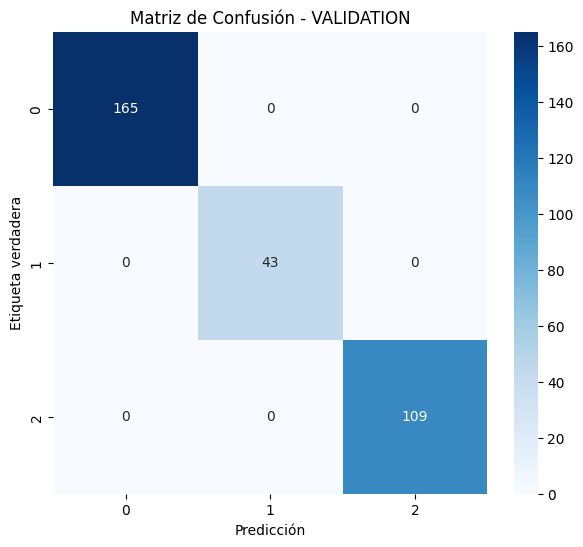


Accuracy: 1.000
F1-score (macro): 1.000
F1-score (weighted): 1.000


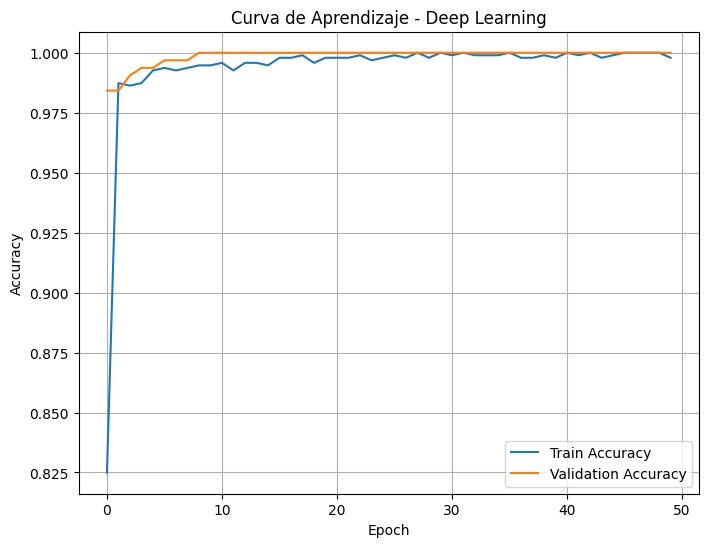

In [14]:
# Este script utiliza Dos_window features

# =========================
# Seleccionar features útiles
# =========================
features = dataset.drop(columns=['window_id','start_time','end_time','label'])
targets = dataset['label']

# =========================
# Codificar etiquetas
# =========================
label_encoder = LabelEncoder()
targets_encoded = label_encoder.fit_transform(targets)
num_classes = len(label_encoder.classes_)
print("Clases encontradas:", label_encoder.classes_)

# =========================
# Escalar features
# =========================
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# =========================
# División Train/Test/Validation
# =========================
X_train_val, X_val, y_train_val, y_val = train_test_split(
    features_scaled, targets_encoded, test_size=0.2, random_state=42, stratify=targets_encoded
)
X_train, X_test, y_train, y_test = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val
)

# =========================
# One-hot encoding
# =========================
y_train_oh = tf.keras.utils.to_categorical(y_train, num_classes)
y_val_oh = tf.keras.utils.to_categorical(y_val, num_classes)

# =========================
# Construir modelo
# =========================
modelo_dl = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(num_classes, activation='softmax')
])

modelo_dl.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# =========================
# Entrenamiento
# =========================
hist = modelo_dl.fit(
    X_train, y_train_oh,
    validation_data=(X_val, y_val_oh),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=2
)

# =========================
# Evaluación
# =========================
y_val_pred_prob = modelo_dl.predict(X_val)
y_val_pred = np.argmax(y_val_pred_prob, axis=1)

clases_str = [str(c) for c in label_encoder.classes_]

print("\n=== Reporte de clasificación ===")
print(classification_report(y_val, y_val_pred, target_names=clases_str))

# Matriz de confusión
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clases_str, yticklabels=clases_str)
plt.xlabel("Predicción")
plt.ylabel("Etiqueta verdadera")
plt.title("Matriz de Confusión - VALIDATION")
plt.show()

# =========================
# Scores finales
# =========================
accuracy_val = accuracy_score(y_val, y_val_pred)
f1_macro = f1_score(y_val, y_val_pred, average='macro')
f1_weighted = f1_score(y_val, y_val_pred, average='weighted')

print(f"\nAccuracy: {accuracy_val:.3f}")
print(f"F1-score (macro): {f1_macro:.3f}")
print(f"F1-score (weighted): {f1_weighted:.3f}")

# =========================
# Curva de aprendizaje
# =========================
plt.figure(figsize=(8,6))
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title("Curva de Aprendizaje - Deep Learning")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()